In [1]:
from hypernodes import registry

In [2]:
registry.folder_template

'tests/nodes/{node_name}/modules'

In [3]:
node = registry.create_or_get("basic_usage")

# Define Config & DAG

In [4]:
from hypster import HP, config


@config
def my_config(hp: HP):
    data_path = hp.text_input("data")
    env = hp.select(["dev", "prod"], default="dev")

    llm_model = hp.select(
        {
            "haiku": "claude-3-haiku-20240307",
            "sonnet": "claude-3-5-sonnet-20240620",
        },
        default="haiku",
    )

In [5]:
node.save_hypster_config(my_config)

In [6]:
%load_ext hamilton.plugins.jupyter_magic

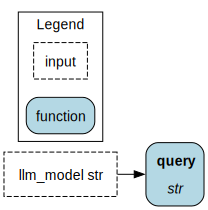

In [7]:
%%cell_to_module dag --display


def query(llm_model: str) -> str:
    return f"Querying {llm_model}..."

In [8]:
node.save_dag(dag)

# Load the Node and Execute it

In [9]:
node = registry.load("basic_usage")

In [10]:
node.instantiate()

In [11]:
results = node.execute()

In [12]:
results

{'query': 'Querying claude-3-haiku-20240307...'}